<a href="https://colab.research.google.com/github/simahashemi/Quasi_Experimental_methods/blob/main/Quasi_Experimental_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Difference-in-Differences(DiD)
In this analysis, we aim to measure the effect of introducing a specific treatment for a particular disease. In our example, some hospitals adopted the treatment (treatment group), while others did not (control group). We assume we have data on the number of cured patients in both groups, collected from last year (before the treatment was introduced) and this year (after the treatment was implemented).

## Generate an artificial dataset

In [79]:
np.random.seed(42)

n = 100

# Define groups and time
group = np.repeat([0, 1], n//2)  # 0 = control, 1 = treatment
time = np.tile([0, 1], n//2)     # 0 = before, 1 = after

# Simulate outcome
baseline = 50
treatment_effect = 5

# Add actual effect for treated group after time
outcome = baseline \
          + 2*time \
          + (-1)*group \
          + treatment_effect*(group*time) \
          + np.random.normal(0, 2, n)

# Create DataFrame
df = pd.DataFrame({
    'outcome': outcome,
    'group': group,
    'time': time
})

df.head()

,outcome,group,time
0,50.993428,0,0
1,51.723471,0,1
2,51.295377,0,0
3,55.046060,0,1
4,49.531693,0,0


## Apply DiD data


In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


df['interaction'] = df['time'] * df['group']
df.head()

# DiD Regression model
DiD_model = ols('outcome ~ time + group + interaction',data = df).fit()

print(DiD_model.summary())


                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     83.69
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.09e-26
Time:                        23:06:30   Log-Likelihood:                -199.72
No. Observations:                 100   AIC:                             407.4
Df Residuals:                      96   BIC:                             417.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      49.6404      0.364    136.398      

The R-squared value is approximately 0.72, indicating that the model explains a substantial portion of the variation in the outcome. The interaction coefficient is 5.6, suggesting that the treatment has a strong positive effect on the outcome.

## Plotting the Results

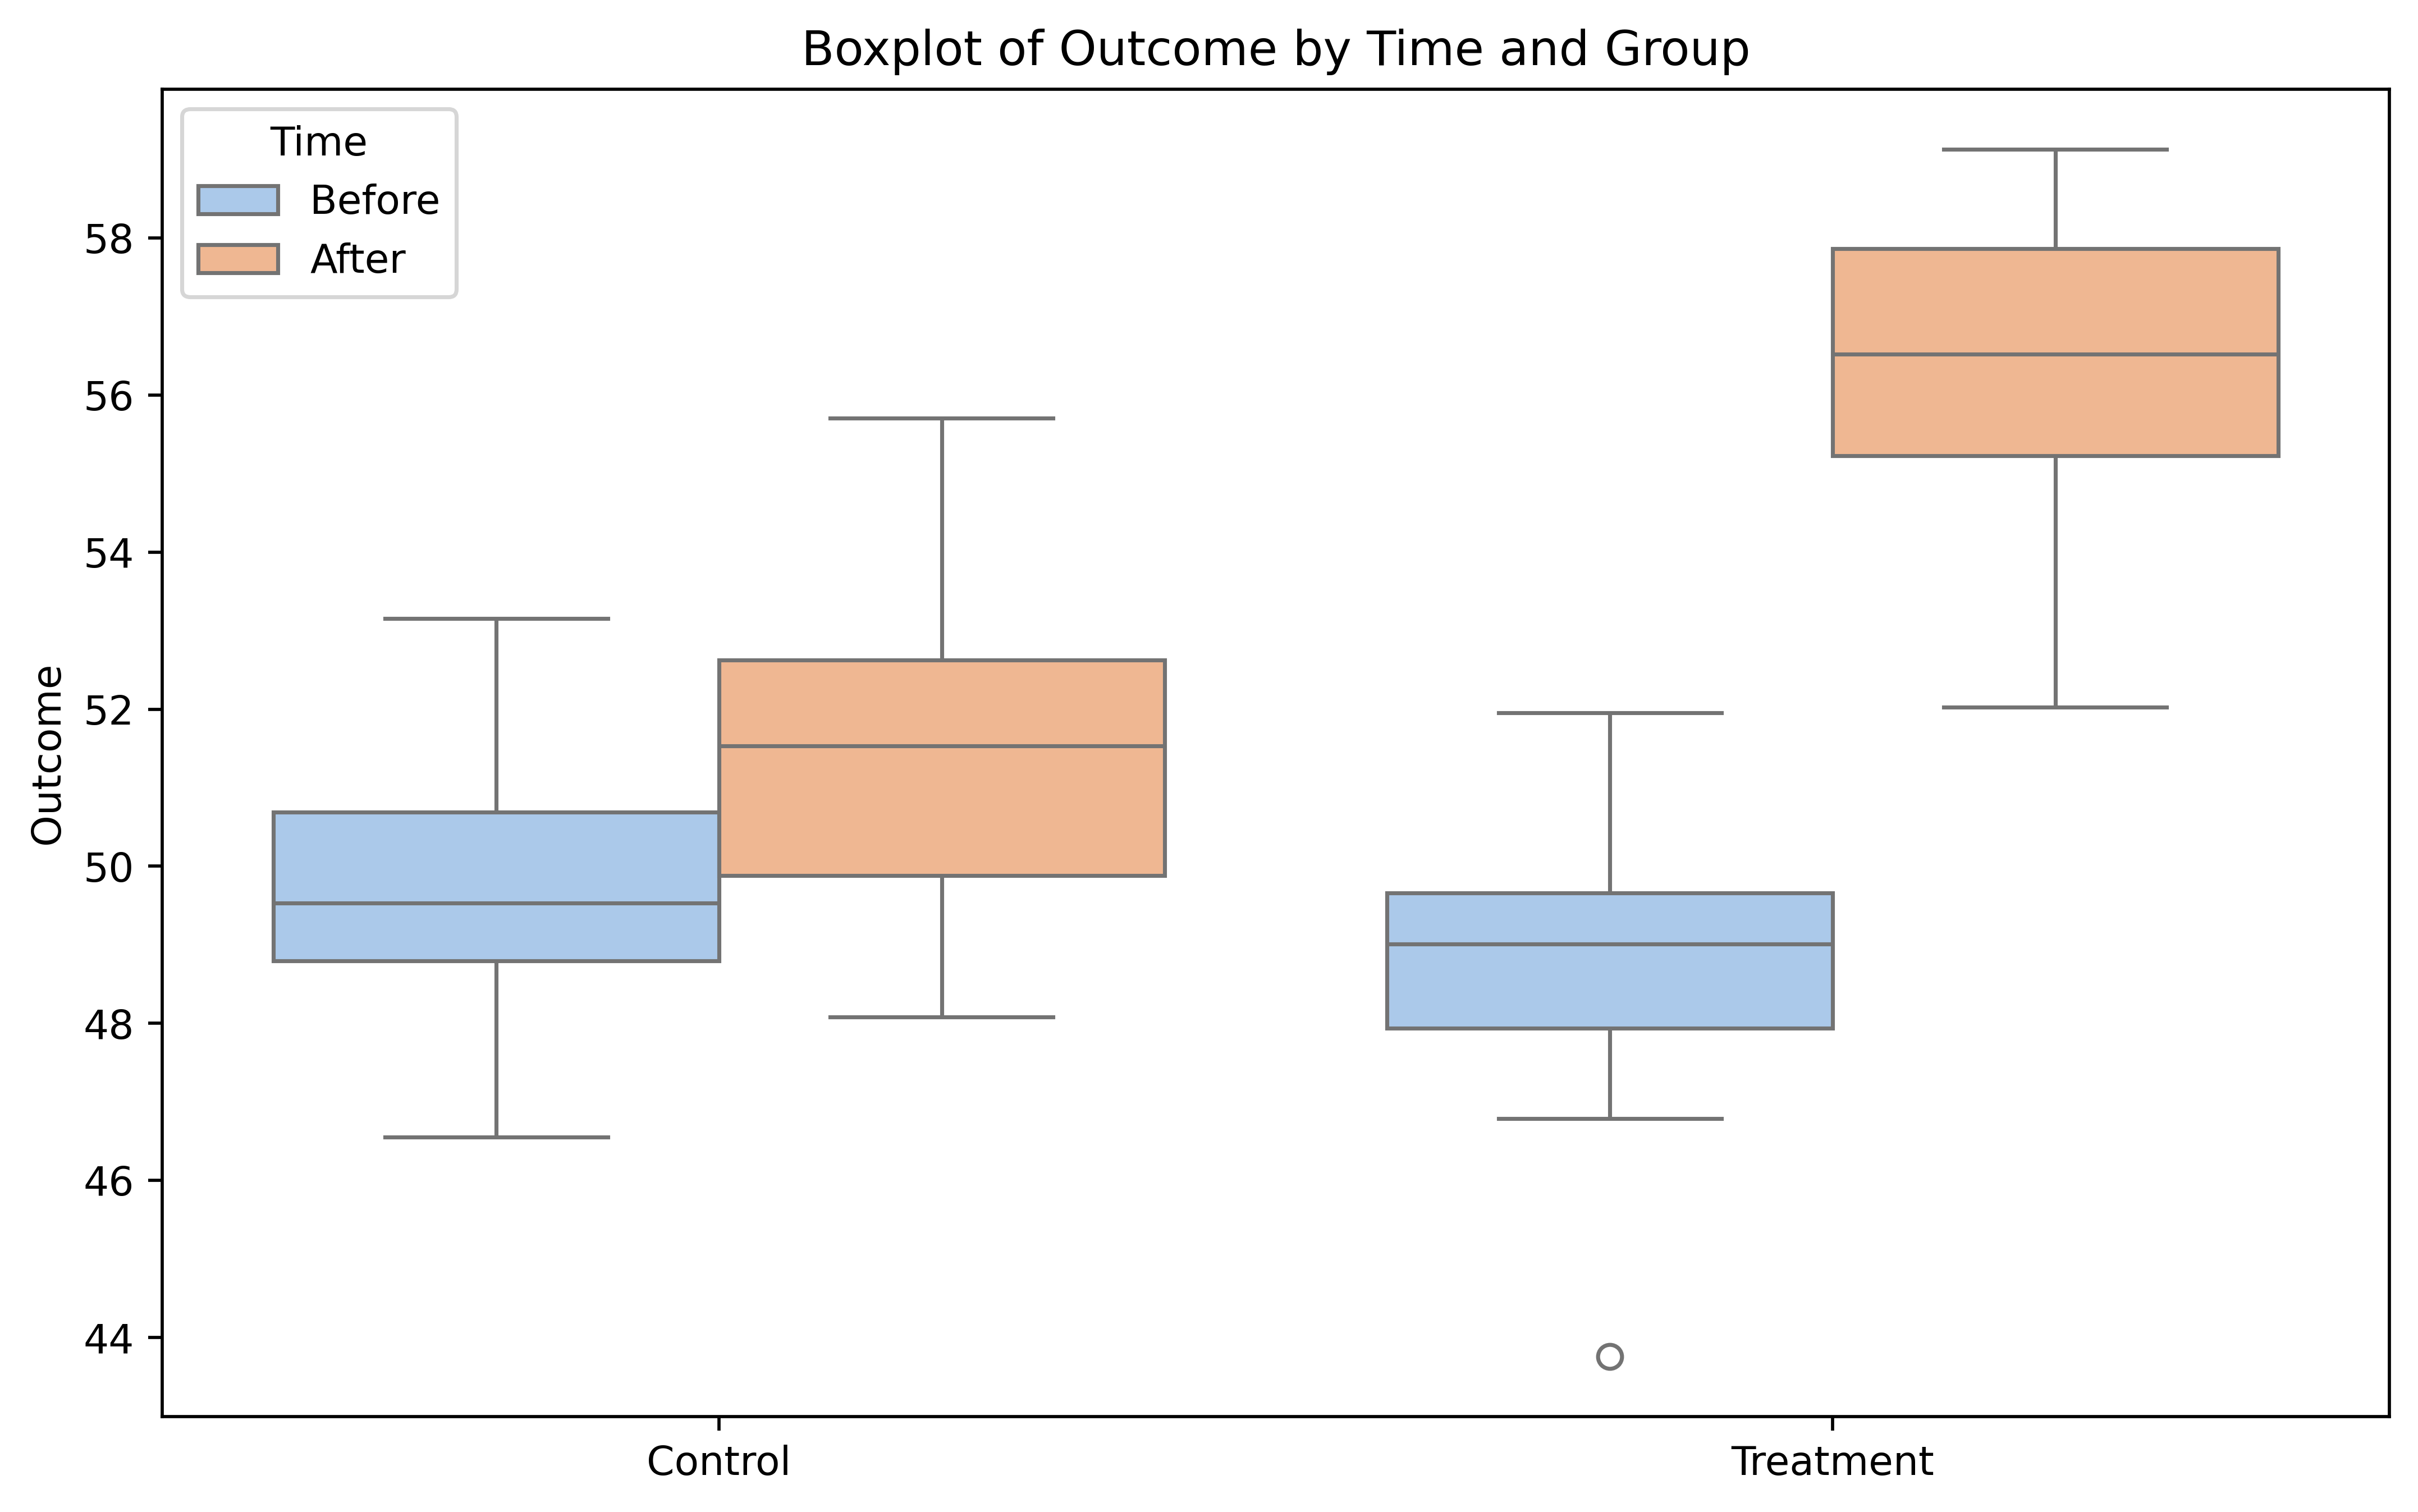

In [91]:
plt.figure(figsize=(10,6),dpi=512)
sns.boxplot(x = 'group',y = 'outcome',data = df,hue = 'time', palette='pastel',hue_order=[0, 1])
plt.xlabel('')
plt.ylabel('Outcome')
plt.title('Boxplot of Outcome by Time and Group')
plt.xticks([0,1],['Control','Treatment'])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Before', 'After'], title='Time')
plt.show()

This plot illustrates the before-and-after stages for both groups. In the control group, the number of cured patients increased only slightly, whereas the treatment group shows a significant increase, indicating a positive effect of the treatment.